In [144]:
import pandas as pd
import re
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import OrdinalEncoder
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (12, 8)  # (width, height) in inches
import numpy as np
import seaborn as sns
!pip install ppscore
import ppscore as pps
import warnings
warnings.filterwarnings("ignore")


In [92]:
df = pd.read_csv(r"C:\Users\Admin\Desktop\data science assighnments\EDA2\EDA2\adult_with_headers.csv")

In [93]:
df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [94]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64

In [95]:
# Function to clean special characters
def replace_special_characters(value, replacement=""):
    """
    Replace special characters in a string with a specified replacement.
    """
    if isinstance(value, str):  # Only process strings
        return re.sub(r'[^a-zA-Z0-9\s]', replacement, value)  # Replace special characters
    return value

In [96]:

# Apply to selected columns for EDA
columns_to_clean = ['workclass', 'occupation']
for col in columns_to_clean:
    df[col] = df[col].apply(replace_special_characters)


In [97]:
df.sample()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
9525,33,Private,143582,HS-grad,9,Separated,Otherservice,Unmarried,Asian-Pac-Islander,Female,0,0,48,China,<=50K


In [98]:
df.drop(columns=['capital_gain', 'capital_loss'], inplace=True)

In [99]:
df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,hours_per_week,native_country,income
0,39,Stategov,77516,Bachelors,13,Never-married,Admclerical,Not-in-family,White,Male,40,United-States,<=50K
1,50,Selfempnotinc,83311,Bachelors,13,Married-civ-spouse,Execmanagerial,Husband,White,Male,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlerscleaners,Not-in-family,White,Male,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlerscleaners,Husband,Black,Male,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Profspecialty,Wife,Black,Female,40,Cuba,<=50K


In [103]:
#Drop the 'fnlwgt' column in place
df.drop('fnlwgt', axis=1, inplace=True)

In [104]:
# One-Hot Encoding
data_encoded = pd.get_dummies(df, drop_first=True)
data_encoded

,age,education_num,hours_per_week,workclass_ Federalgov,workclass_ Localgov,workclass_ Neverworked,workclass_ Private,workclass_ Selfempinc,workclass_ Selfempnotinc,workclass_ Stategov,...,native_country_ Puerto-Rico,native_country_ Scotland,native_country_ South,native_country_ Taiwan,native_country_ Thailand,native_country_ Trinadad&Tobago,native_country_ United-States,native_country_ Vietnam,native_country_ Yugoslavia,income_ >50K
0,39,13,40,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
1,50,13,13,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
2,38,9,40,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,53,7,40,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,28,13,40,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,12,38,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
32557,40,9,40,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,1
32558,58,9,40,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
32559,22,9,20,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [105]:

encoder = OrdinalEncoder()
df['education'] = encoder.fit_transform(df[['education']])
df['occupation'] = encoder.fit_transform(df[['occupation']])
df['workclass'] = encoder.fit_transform(df[['workclass']])


In [106]:
df

,age,workclass,education,education_num,marital_status,occupation,relationship,race,sex,hours_per_week,native_country,income
0,39,7.0,9.0,13,Never-married,1.0,Not-in-family,White,Male,40,United-States,<=50K
1,50,6.0,9.0,13,Married-civ-spouse,4.0,Husband,White,Male,13,United-States,<=50K
2,38,4.0,11.0,9,Divorced,6.0,Not-in-family,White,Male,40,United-States,<=50K
3,53,4.0,1.0,7,Married-civ-spouse,6.0,Husband,Black,Male,40,United-States,<=50K
4,28,4.0,9.0,13,Married-civ-spouse,10.0,Wife,Black,Female,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,4.0,7.0,12,Married-civ-spouse,13.0,Wife,White,Female,38,United-States,<=50K
32557,40,4.0,11.0,9,Married-civ-spouse,7.0,Husband,White,Male,40,United-States,>50K
32558,58,4.0,11.0,9,Widowed,1.0,Unmarried,White,Female,40,United-States,<=50K
32559,22,4.0,11.0,9,Never-married,1.0,Own-child,White,Male,20,United-States,<=50K


Text(0.5, 1.0, 'Before Removing Outliers')

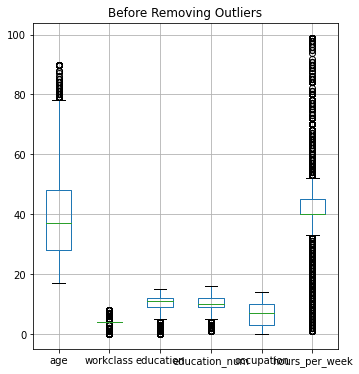

In [107]:
# Box plot before removing outliers
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
df.boxplot()
plt.title("Before Removing Outliers")


In [108]:
# Strip spaces from all column names
df.columns = df.columns.str.strip()


In [109]:

# Replace '?' with NaN
df.replace('?', pd.NA, inplace=True)

In [110]:
# For numerical columns, fill NaN with the mean
df['age'].fillna(df['age'].mean(), inplace=True)
df['education_num'].fillna(df['education_num'].mean(), inplace=True)
df['hours_per_week'].fillna(df['hours_per_week'].mean(), inplace=True)

In [111]:
# Check for missing values (NaN)
print(df.isnull().sum())

age               0
workclass         0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
hours_per_week    0
native_country    0
income            0
dtype: int64


In [112]:
df.dtypes


age                 int64
workclass         float64
education         float64
education_num       int64
marital_status     object
occupation        float64
relationship       object
race               object
sex                object
hours_per_week      int64
native_country     object
income             object
dtype: object

In [113]:
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns

In [114]:
print("Numerical Columns:", numerical_columns)

Numerical Columns: Index(['age', 'workclass', 'education', 'education_num', 'occupation',
       'hours_per_week'],
      dtype='object')


In [115]:
# Check for any NaN values in the numerical columns
print(df[['age', 'education_num', 'hours_per_week']].isnull().sum())

age               0
education_num     0
hours_per_week    0
dtype: int64


In [116]:
for col in numerical_columns:
    if df[col].dtype == 'object':  # Check if the column is of type object
        df[col] = pd.to_numeric(df[col], errors='coerce')  # Convert to NaN if error


In [117]:
# Initialize the Isolation Forest model
iso_forest = IsolationForest(contamination=0.05)  # contamination represents the expected proportion of outliers


In [126]:
# Fit the model and predict outliers
outliers = iso_forest.fit_predict(df[['age','workclass', 'education_num', 'hours_per_week']])


In [127]:

# Convert the output to a DataFrame
outliers_df = pd.DataFrame(outliers, columns=['outlier'])



In [128]:
# -1 indicates an outlier, 1 indicates a normal data point
df['outlier'] = outliers_df['outlier']


In [129]:
# Display the rows with outliers
outlier_data = df[df['outlier'] == -1]
print(outlier_data)

       age  workclass  education  education_num          marital_status  \
27      54        0.0       15.0             10      Married-civ-spouse   
61      32        0.0        5.0              4   Married-spouse-absent   
77      67        0.0        0.0              6      Married-civ-spouse   
89      43        1.0       10.0             16           Never-married   
96      48        6.0       10.0             16      Married-civ-spouse   
...    ...        ...        ...            ...                     ...   
32525   81        0.0        8.0             11                Divorced   
32531   30        0.0        9.0             13           Never-married   
32539   71        0.0       10.0             16      Married-civ-spouse   
32542   72        0.0       11.0              9      Married-civ-spouse   
32548   65        6.0       14.0             15           Never-married   

       occupation    relationship                 race      sex  \
27            0.0         Husban

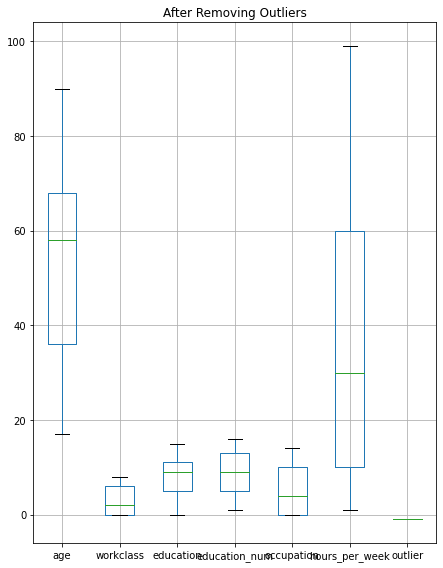

In [130]:
# Box plot after removing outliers
plt.subplot(1, 2, 2)
outlier_data.boxplot()
plt.title("After Removing Outliers")

plt.tight_layout()
plt.show()

In [131]:
# Define StandardScaler
scaler = StandardScaler()


In [132]:
# Select the columns to scale
columns_to_scale = ['age','workclass','education', 'education_num','occupation', 'hours_per_week']


In [133]:

# Apply scaling
df_scaled = pd.DataFrame(scaler.fit_transform(df[columns_to_scale]), columns=columns_to_scale)

In [134]:
df_scaled

,age,workclass,education,education_num,occupation,hours_per_week
0,0.030671,2.150579,-0.335437,1.134739,-1.317809,-0.035429
1,0.837109,1.463736,-0.335437,1.134739,-0.608387,-2.222153
2,-0.042642,0.090050,0.181332,-0.420060,-0.135438,-0.035429
3,1.057047,0.090050,-2.402511,-1.197459,-0.135438,-0.035429
4,-0.775768,0.090050,-0.335437,1.134739,0.810458,-0.035429
...,...,...,...,...,...,...
32556,-0.849080,0.090050,-0.852205,0.746039,1.519881,-0.197409
32557,0.103983,0.090050,0.181332,-0.420060,0.101036,-0.035429
32558,1.423610,0.090050,0.181332,-0.420060,-1.317809,-0.035429
32559,-1.215643,0.090050,0.181332,-0.420060,-1.317809,-1.655225


In [137]:
correlation_matrix = df[columns_to_scale].corr()



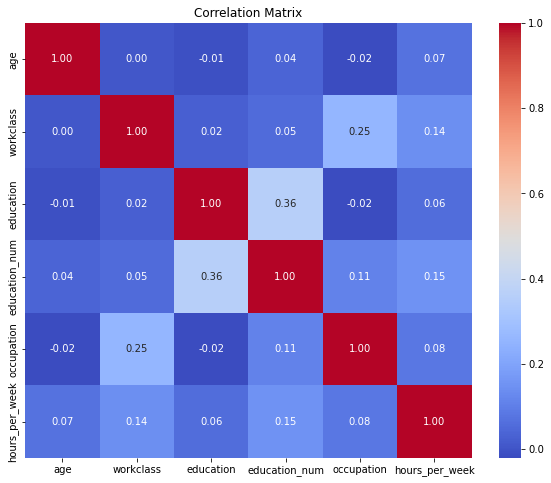

In [140]:
# Visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

In [145]:
# Compute the PPS matrix
pps_matrix = pps.matrix(df)


In [146]:
# Extract only relevant columns for visualization
pps_matrix = pps_matrix.pivot(index='x', columns='y', values='ppscore')


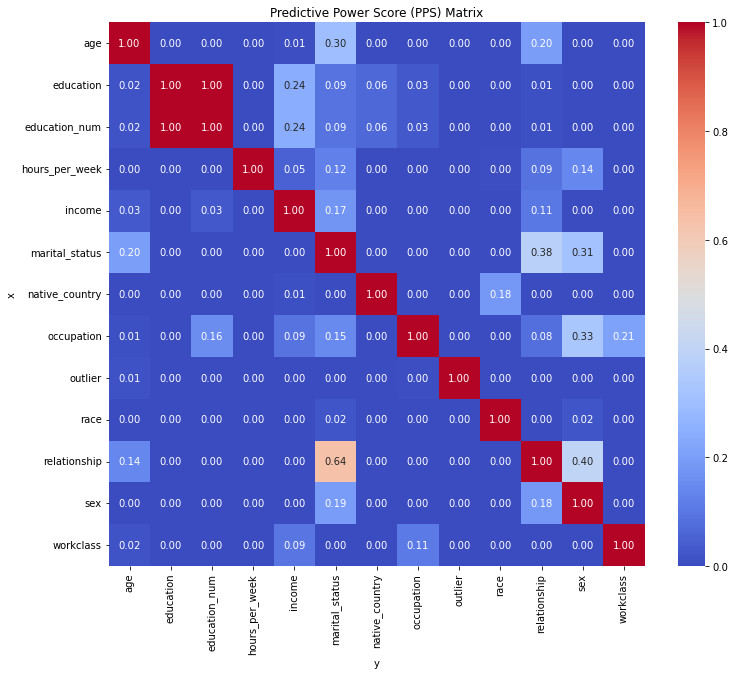

In [147]:
# Visualize the PPS matrix
plt.figure(figsize=(12, 10))
sns.heatmap(pps_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Predictive Power Score (PPS) Matrix")
plt.show()

In [ ]:
findings :- Here we can say that only marital_status and relationship have moderate ppscore.